
<h1><b>Statistique en Bioinformatique : </b> TME1 </h1>
<br>
L’objectif de ce TME est l’analyse statistique d’une famille de protéines à travers son alignement de séquences:
<br>
<ul>
<li> objectif 1: détection des positions conservées, </li>
<li> objectif 2: détection de séquences qui appartiennent à la même famille, </li>
</ul>
<vr>
<div class="alert alert-warning" role="alert" style="margin: 10px">
<p><b>Soumission</b></p>
<ul>
<li>Renommer le fichier TME1.ipynb pour SBAS_TME_1_NomEtudiant1_NomEtudiant2.ipynb </li>
<li>Soumettre via Moodle avant le prochain TME
</ul>
<br>
REMARQUE : Les fichiers seront aussi corrigés numériquement. Faites donc attention à <b> ne pas modifier la signature et le renvoi des fonctions! </b>
<br>
</div>

Nom etudiant 1 : TANTOUCH 
<br>
Nom etudiant 2 :
<br>

<b>DONNÉES</b> <br>
Il y a 2 fichiers avec les données telecharché à TME1: <br>
<ul>
<li> Dtrain.txt: C’est un alignement de M = 5643 protéines d’une seule famille en format FASTA,
<br>
    Les lignes qui commencent avec “>” contiennent des commentaires (nom de la protéine etc.). Elles n’ont aucune importance pour notre projet. Les autres lignes contiennent les séquences, que l’on va utiliser dans le projet. Les séquences sont alignées, elles ont toutes la même longueur (L = 48 positions dans notre fichier). Chaque position i = 0, ..., L − 1 d'une séquence contient soit un acide aminé (A,C,...,Y, il y en a 20) ou un trou (–), que l'on considère comme 21ème lettre. Ensemble elles forment l'alphabet: 
    A =  {A, C, D, E, F, G, H, I, K, L, M, N, P, Q, R, S, T, V, W, Y, -}, avec q = 21 lettres différentes.
</li>
    <br>
<li> testseq.txt:  testseq.txt: Même format de Dtrain.txt, mais avec une seule séquence b = (b0 , ..., bN −1 ) plus longue (longueur N = 114 > L). On va scanner cette séquence pour trouver une sous-séquence qui appartient à la famille definie par Dtrain.txt. </li>
</ul>

Exercice 1: Pour chaque position i = 0, ..., L − 1 de l' alignement et chaque acide aminé a ∈ A (trou compris), calculer le nombre d’occurences ni(a) et le poid ωi(a), où :
\begin{equation*}
n_{i}(a) = \textrm{nombre d'occurrences de l'acide aminé a dans la colonne i}
\end{equation*}

\begin{equation*}
\omega_i(a) = \frac{n_i(a)+1}{M+q}\ .
\end{equation*}

In [1]:
import sys
import numpy as np
aa = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', '-']
q = 21
#aa = ['A', 'B', 'C', '-']
#q = 4
#aa = ['A', 'G', 'C', 'T', '-']
#q = 5

In [3]:
#load path Files
input_dataset_f = 'Dtrain.txt'
input_sequence_f = 'test_seq.txt'
#input_dataset_f = 'DtrainToy.txt'
#input_sequence_f = 'test_seqToy.txt'
#input_dataset_f = 'DtrainToyTD.txt'

In [69]:
#load DTrain File
def load_train(input_f):
    """Input 1 : a multiple sequence alignment (MSA) in FASTA format
    Output 1 : the MSA (see REMARK)
    Output 2 : the length of the aligned sequences (MSA length)
    Output 3 : the number of sequences in the MSA (MSA depth)
    
    REMARK : The MSA should be represented as an ordered collection of sequences.
    Meaning, the first sequence in the file must be the first sequence in the
    data structure. You can represent it as a list of lists of char, a list of 
    str, a numpy matrix, etc. Just be consistent throughout the whole TME1"""

    train_set = []  #pour stockage des séquences

    with open(input_f, 'r') as f:
        for line in f:
            line = line.strip()
            if not line.startswith(">"):  #on vz ignorer les lignes de commentaires
                train_set.append(line)
    
    # Calcul des dimensions de l'alignement
    m = len(train_set)  #nombre de sequences
    L = len(train_set[0]) if m > 0 else 0  #longueur des sequences

    return train_set, L, m

#on charge les données d'entraînement
train_set, L, m = load_train(input_dataset_f)

#pour affichage des résultats
print("Training data (watch out, this is long):")
print(train_set)

print("\nMSA length:", L)
print("MSA depth:", m)


Training data (watch out, this is long):
['-ALYDCEAENSDELTFNRGEIIQLIDRPDNDWWEGFIQSDSRRGMFPV', 'KAIYNCSADHPDELTFSEGEVLVVDGEEDSDWWFGHVENESRRGVFPV', 'KALYNCVADNADELTFSEGEMIIVDGEEDKEWWVGHIDGETRRGVFPV', 'KALYNCVADNADELTFSEGEMIIVDGEEDKEWWVGHIDGETRRGVFPV', 'KAVYNCVADNPDELTFAEGEVIVVDGEEDQEWWVAGPHRR--------', 'KAVYNCVADNPDELTFAEGEVIVVDGEEDQEWWVAGPHRR--------', 'KALYNCLADNPDELTFTEGEVIVVDGEEDQEWWKGHIEGDTRRGVFPT', 'KALYNCVADNPDELTFSEGDVIIVDGEEDQEWWIGHIDGDGRKGAFPV', 'KALYNCVADNPDELTFSEGDVIIVDGEEDQEWWIGHIDGDGRKGAFPV', 'KALYNCVADNPDELTFSEGDVIIVDGEEDQEWWIGHIDGDGRKGAFPV', 'KALYNCVADNPDELTLSEGDVIIVDGEEDQEWWIGHIDGESRKGAFPV', 'KALYNCVADNPDELTFSEGDVIIVDGEEDQEWWIGHIDGESRKGAFPV', 'KALYNCVADNPDELTFSEGDVIIVDGEEDQEWWIGHIDGESRKGAFPV', 'KALYNCVADNPDELTFSEGDVIIVDGEEDQEWWIGHIDGESRKGAFPV', 'KAIYHCSADNPDELTFSEGEIIVVDGEEDKEWWIGHIDGENRRGAFPV', '-TIYDCQADNDDELTFMEGEVIVVTGEEDQEWWIGHIEGQERKGVFPV', '-TIYDCQADNDDELTFVEGEVIIVTGEEDQEWWIGHIEGQERKGVFP-', '-TIYDCQADNDDELTFVEGEVIIVTGEEDQEWWIGHIEGQERKGVFP-', '-TIYDCQADNDDELTFIEGEV

In [71]:
#Computing wi(a)
def get_pwm(train_set, L, m, alphabet):
    """Input 1 : The MSA (see REMARK of the load_train function)
    Input 2 : the MSA length
    Input 3 : the MSA depth
    Input 4 : the alphabet used (it must be an ordered collection of non-repeating characters)
    Output 1 : position-weight matrix of shape (q, L) where q is len(alphabet)"""
    
    #on initialise par une matrice de poids nulle
    pwm = np.zeros((len(alphabet), L))  # Matrice de taille q x L
    
    #dictiinnaire pour mapper chaque acide aminé à un index dans la matrice
    aa_index = {aa: idx for idx, aa in enumerate(alphabet)}
    
    # Comptage des occurrences des acides aminés
    for seq in train_set:
        for i in range(L):
            aa = seq[i]  # Acide aminé à la position i
            if aa in aa_index:  # Vérifier si l'acide aminé est valide
                pwm[aa_index[aa], i] += 1

    #on calcul les poids ωi(a) en utilisant la formule de l'enonce
    pwm = (pwm + 1) / (m + len(alphabet))
    
    return pwm

PWM = get_pwm(train_set, L, m, aa)
print(PWM)


[[0.0002 0.7253 0.0102 ... 0.0343 0.0002 0.2382]
 [0.0002 0.0002 0.0019 ... 0.0076 0.0002 0.0169]
 [0.0002 0.0002 0.0004 ... 0.0002 0.0002 0.0002]
 ...
 [0.0002 0.0002 0.0002 ... 0.0002 0.0002 0.0002]
 [0.0002 0.0002 0.0002 ... 0.0178 0.0002 0.0002]
 [0.3132 0.1554 0.0821 ... 0.0567 0.0678 0.3535]]


Exercise 2: Trouvez les positions les plus conservées en utilisant l’entropie relative.
<br>
2.1) Pour chaque position i = 0, ..., L − 1, determiner l’entropie relative Si<br>
\begin{equation*}
\label{eq:entropie}
S_i = \log_2(q) + \sum_{a\in {\cal A}} \omega_i(a)\cdot \log_2\left[\omega_i(a) \right]\ .
\end{equation*}
<br>


In [73]:
import numpy as np

def si_calculate(wi):
    """ 
    Input 1 : Weight vector (of length q) representing column i of the MSA
    Output 1 : Relative entropy of column i
    """
    q = len(wi)  ##q = nombre d'acides aminés (taille de l'alphabet)
    
    #calcul de l'entropie relative
    log_q = np.log2(q)  ## log2 du nombre total de lettres dans l'alphabet (21)
    entropy_term = np.sum(wi * np.log2(wi))  
    
    #entropie relative pour la position
    si = log_q + entropy_term
    return si

#calcul des entropies relatives pour chaque position
si = [si_calculate(PWM[:, i]) for i in range(L)]  ##calcul pour chaque colonne (chaque position)

#affichage des résultats
print("L'Entropie relative de chaque position est donc :")
print(si)

#pour les positions les plus conservées
positions_conservees = sorted(range(len(si)), key=lambda k: si[k])[:5]
print("Les positions les plus conservées sont :", positions_conservees)


L'Entropie relative de chaque position est donc :
[1.8547663336943563, 3.180777920885486, 2.0531938229370845, 2.535683150925362, 1.9140965960418472, 2.82157361358149, 0.7342497362887057, 1.9941697936889038, 0.7911537784490958, 0.620221101812374, 1.1826498644120496, 1.4543422165059239, 2.808631677055901, 3.168555723946191, 1.6072965537830544, 2.5144049655421954, 0.8107012464205847, 1.3996461274828196, 3.2208097503024034, 2.454290879049115, 1.0463314843282085, 2.2925291225114206, 0.5994283066125714, 2.2914232209540812, 1.5935699638823886, 1.0669572914365588, 0.7915295920400256, 0.5456591354603471, 1.1618827719052391, 1.0214495913204358, 1.762353780969324, 4.176827384837058, 1.9604524394188956, 0.7790672675382986, 2.5771802920479137, 1.0585203618533967, 0.6361714675326149, 0.454715779516762, 1.1572928388375066, 2.3726424080109214, 2.221087050256646, 0.8314607366842672, 0.7787626203889961, 3.875513964134912, 1.2846226500451734, 2.205529913829334, 3.9862728301572674, 2.0581653986603863]
Les

2.2) Indiquez les acides aminees (ai*) des trois positions les plus conservées : 
\begin{equation}
\label{eq:conserved}
a_i^\star = {\rm argmax}_{a\in {\cal A}} \omega_i(a)\ .
\end{equation}

In [75]:
def get_aiStart(Si, PWM, naa):
    """ 
    Input 1 : Relative entropy vector of length L
    Input 2 : Position-weight matrix of shape (q, L)
    Input 3 : Integer naa, specifying the number of top-conserved residues
    Output 1 : List of length naa containing the amino acid type (char) of the 
               top-naa conserved columns
    """
    
    # Indices des `naa` positions les plus conservées (faible entropie)
    top_conserved_indices = sorted(range(len(Si)), key=lambda k: Si[k])[:naa]

    # Trouver l'acide aminé le plus fréquent (argmax) pour chaque position conservée
    top_aa = []
    for idx in top_conserved_indices:
        max_aa_index = PWM[:, idx].argmax()  ##pour trouver l'indice de l'AA dominant
        top_aa.append(aa[max_aa_index])      ##alors ajout de l'AA correspondant à la liste

    return top_aa

#affichage des acides aminés des trois positions les plus conservées
print("Les acides aminés des trois positions les plus conservées sont :")
print(get_aiStart(si, PWM, 3))


Les acides aminés des trois positions les plus conservées sont :
['N', 'S', 'T']


2.3) Tracer l’entropie rélative en fonction de chaque position i.

In [ ]:
import matplotlib.pyplot as plt


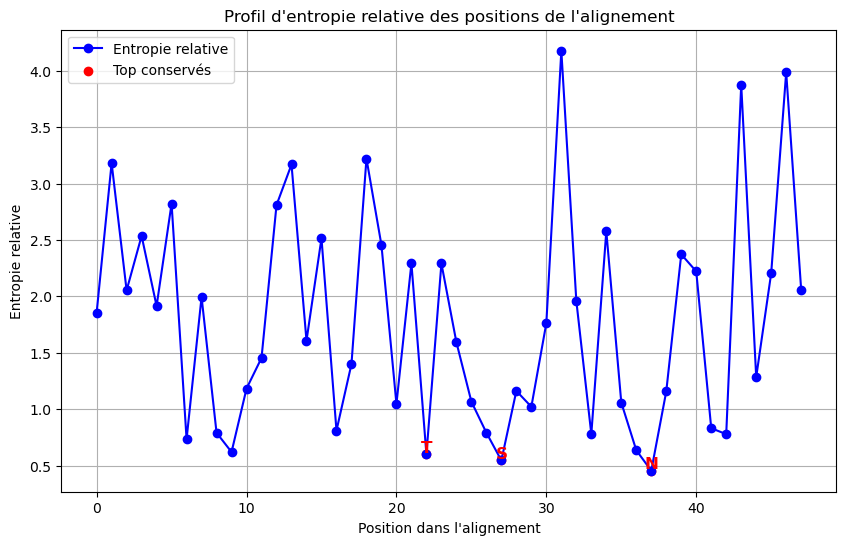

In [77]:
import matplotlib.pyplot as plt
import numpy as np

def plot_entropy(si, naa, top_aa):
    """ 
    Input : 
    - si : vecteur d'entropie relative de longueur L
    - naa : nombre d'acides aminés les plus conservés à mettre en évidence
    - top_aa : liste des acides aminés les plus conservés
    
    Output : 
    - Un graphique de l'entropie relative par position avec les sites conservés mis en évidence
    """
    
    L = len(si)
    positions = np.arange(L)

    #indices des naa positions les plus conservées (faible entropie)
    top_conserved_indices = sorted(range(L), key=lambda k: si[k])[:naa]

    #tracé du graphe
    plt.figure(figsize=(10, 6))
    plt.plot(positions, si, label='Entropie relative', color='blue', marker='o', linestyle='-')

    #mise en évidence des positions les plus conservées
    plt.scatter(top_conserved_indices, [si[i] for i in top_conserved_indices], 
                color='red', label='Top conservés')

    #on annote ls aa conservés sur le graphique
    for i, idx in enumerate(top_conserved_indices):
        plt.text(idx, si[idx] + 0.02, top_aa[i], ha='center', fontsize=12, fontweight='bold', color='red')

    #labels et titre
    plt.xlabel("Position dans l'alignement")
    plt.ylabel("Entropie relative")
    plt.title("Profil d'entropie relative des positions de l'alignement")
    plt.legend()
    plt.grid(True)

    # Sauvegarde de la figure
    plt.savefig('entropy.png', dpi=300)
    plt.show()

#appel de la fonction avec l'exemple donné
plot_entropy(si, 3, get_aiStart(si, PWM, 3))


Exercise 3: Déterminer les paramètres f(0)(b) du modèle nul, où
\begin{equation}
f^{(0)}(b) = \frac 1L \sum_{i=0}^{L-1} \omega_i(b)\ ,
\end{equation}

In [79]:
import numpy as np

def f0_calcule(PWM):
    """ 
    Input 1 : position-weight matrix of shape (q, L)
    Output 1 : vector of size q containing the null model f°(b)
    """
    
    #pour le calcul de la moyenne des poids pour chaque aa sur toutes les positions
    f_0 = np.mean(PWM, axis=1)  ##moyenne sur les colonnes (positions)
    
    return f_0

#calcul du modèle nul f°(b)
f_0 = f0_calcule(PWM)
print(f_0)


[0.0588 0.0075 0.0801 0.0849 0.0419 0.0905 0.0127 0.0505 0.0511 0.0745
 0.0119 0.0356 0.0379 0.0343 0.0451 0.0484 0.0407 0.0592 0.0366 0.0386
 0.0592]


Exercise 4: (à appliquer à testseq.txt): Déterminer l(bi,...,bi+L−1)  pour chaque sous-séquence de longueur L. 
Déterminer si il y a des sous-séquences de la famille definie par Dtrain. 
Tracer la log-vraisemblance en fonction de sa première position i = 0, ..., N − L.
\begin{equation}
\label{eq:ll}
\ell(b_0,...,b_{L-1}) = \log_2 \frac {P(b_0,...,b_{L-1} | \omega )
}{P^{(0)}(b_0,...,b_{L-1})}
= \sum_{i=0}^{L-1} \log_2 \frac {\omega_i(b_i)}{f^{(0)}(b_i)}\ .
\end{equation}

4.1: Faites une fonction pour calculer la log-vraisemblance, d'une séquence de taille L.

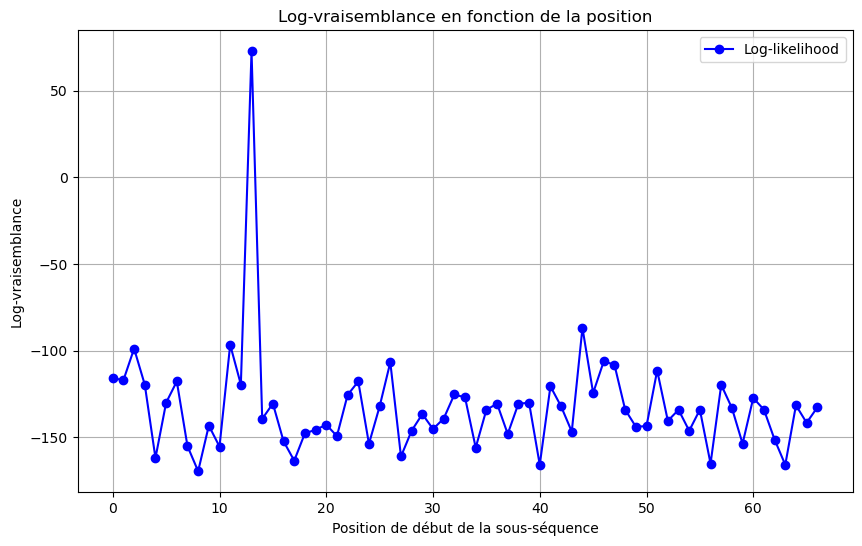

In [81]:
#computing log-likehood
import numpy as np

def loglikehood(seq, PWM, f_0, L):
    """
    Input 1 : sequence of which you want to calculate the log-likelihood
    Input 2 : position-weight matrix of shape (q, L)
    Input 3 : null model vector of length q
    Input 4 : MSA length
    Output 1 : log-likelihood of the sequence seq
    """
    
    #on init le log-vraisemblance
    ll = 0
    
    #on convertut la seq en indices (en supposant un alphabet avec 20 acides aminés + un pour le gap)
    aa_to_index = {'A': 0, 'C': 1, 'D': 2, 'E': 3, 'F': 4, 'G': 5, 'H': 6, 'I': 7, 'K': 8, 'L': 9, 'M': 10,
                   'N': 11, 'P': 12, 'Q': 13, 'R': 14, 'S': 15, 'T': 16, 'V': 17, 'W': 18, 'Y': 19}
    
    for i in range(L):
        aa = seq[i]  ##l'acide aminé à la position i de la séquence
        aa_idx = aa_to_index[aa]  ##obtenir l'indice correspondant de l'acide aminé dans l'alphabet
        
        #log-vraisemblance pour chaque aa à la position i
        ll += np.log2(PWM[aa_idx, i] / f_0[aa_idx])  ##on utilise la formule de la log-vraisemblance
    
    return ll

#on test la log-vraisemblance sur un dataset
def plot_log_likelihood(seq, PWM, f_0, L):
    """Plot the log-likelihood for each sub-sequence of length L in the sequence."""
    
    N = len(seq)
    log_likelihoods = []
    
    # Calcul de la log-vraisemblance pour chaque sous-séquence de longueur L
    for i in range(N - L + 1):
        sub_seq = seq[i:i+L]
        ll = loglikehood(sub_seq, PWM, f_0, L)
        log_likelihoods.append(ll)
    
    # Tracé du graphe
    plt.figure(figsize=(10, 6))
    plt.plot(range(N - L + 1), log_likelihoods, label="Log-likelihood", color='blue', marker='o', linestyle='-')
    plt.xlabel("Position de début de la sous-séquence")
    plt.ylabel("Log-vraisemblance")
    plt.title("Log-vraisemblance en fonction de la position")
    plt.legend()
    plt.grid(True)
    
    plt.savefig('log_likelihood.png', dpi=300)
    plt.show()

# Exemple d'application sur un jeu de données
seq = "PPAAAPQPKEPRYKALYDFAGQSAGELSLGKDEIILVTQKENNGWWLASRLDKSASGWAPSAYLEEVVQRVAAAPPARPVNGAAGGKPKPPAPPAKRPAARKAVNGDSARDSGY" 
plot_log_likelihood(seq, PWM, f_0, L)


4.2: Faites une fonction qui etant donné une séquence de taille supérieur à k génère toutes les sous-séquences de taille k. Avec cette fonction, trouvez toutes les sous-séquences de taille L de la séquence en testseq.txt

In [89]:
#computing sliding_window 
def sliding_window(seq, k):
    """Input 1 : sequence of length > k
    Input 2 : window length (int)
    Output 1 : list of windows of length k generated from sequence seq"""
    
    #on commence par init une liste pour stocker les fenêtres
    windows = []
    
    #ensuite on genere les fenêtres de taille k a partir de la seq
    for i in range(len(seq) - k + 1):  ##parcours de la seq pour extraire les fenêtres
        windows.append(seq[i:i + k])  ##ajout de la fenêtre dans la liste
    
    return windows

#pour lire le fichier de séquences (utile si le fichier contient plusieurs séquences)
def load_sequences(file_path):
    sequences = []
    with open(file_path, 'r') as file:
        current_sequence = ""  ##variable pour stocker la seq en cours
        for line in file:
            line = line.strip()  ##retrait des espaces et des nouvelles lignes
            if line.startswith(">"):  ##si ligne = en-tête (comme c'et le cas pour par ex : >seq_id)
                if current_sequence:  ##si seq collectee, on l'ajoute à la liste
                    sequences.append(current_sequence)
                current_sequence = ""  #reinit pr nouvelle séquence
            else:
                current_sequence += line  ##ajoyt de l'eleement de la ligne à la seq en cours
        if current_sequence:  ##pour l'ajout de la dernière seq si elle existe
            sequences.append(current_sequence)
    return sequences

#fonction pour extraire toutes les sous-séquences de longueur L à partir du fichier (si applicable)
def find_subsequences(file_path, L):
    sequences = load_sequences(file_path)
    subsequences = []

    #pour chaque seq du fichier, on veut generer ttes les sous-seq de taille L
    for seq in sequences:
        subsequences.extend(sliding_window(seq, L))  ##ajoute les sous-seq a la liste
    
    return subsequences

#application de la fonction pour generer ttes les sous-seq de taille L
L = 48  ##ongueur des sous-seq
subsequences = find_subsequences("test_seq.txt", L)

#on affiche les premieres sous-seq pour verifier si fonction tourne
print(subsequences[:5])


['PPAAAPQPKEPRYKALYDFAGQSAGELSLGKDEIILVTQKENNGWWLA', 'PAAAPQPKEPRYKALYDFAGQSAGELSLGKDEIILVTQKENNGWWLAS', 'AAAPQPKEPRYKALYDFAGQSAGELSLGKDEIILVTQKENNGWWLASR', 'AAPQPKEPRYKALYDFAGQSAGELSLGKDEIILVTQKENNGWWLASRL', 'APQPKEPRYKALYDFAGQSAGELSLGKDEIILVTQKENNGWWLASRLD']


4.3: Calculer la log-vraisemblance pour toutes les sous-sequences trouvées en 4.2 et tracer un graphique de log-vraisemblance, avec en abscisse la position initiale de la sous-sequence.

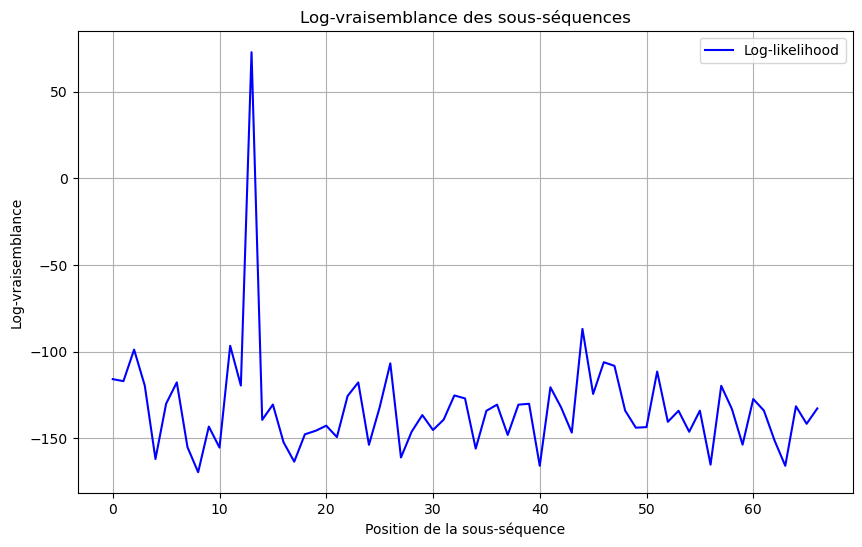

In [91]:
import matplotlib.pyplot as plt
import numpy as np

#fnction pour le calcul du log-vraisemblance pour une sous-séquence
def loglikehood(seq, PWM, f_0, k):
    """Calcul de la log-vraisemblance pour une seule sous-séquence"""
    log_likelihood = 0
    for i in range(k):
        aa = seq[i]  ##aa à la position i de la sous-séquence
        aa_index = aa_dict[aa]  ##indice dans l'alphabet (assurez-vous de l'indexation correcte)
        log_likelihood += np.log2(PWM[aa_index, i] / f_0[aa_index])  ##calcul de log2(wi(bi) / f0(bi)) selon formule enoncé
    return log_likelihood

# Fonction pour calculer la log-vraisemblance pour toutes les sous-seq
def likelihoodAllSousSeq(subseqs, PWM, f_0, k):
    """Input 1 : list of all subsequences of length k
    Input 2 : position-weight matrix of length shape (q,k)
    Input 3 : null model vector of length k
    Input 4 : length of each subsequence
    Output 1 : log-likelihood vector of length len(subseqs) - k + 1
    
    REMARK : The length of the subsequences must match the
    number of columns in the PWM and the length of the null model!"""
    
    lhs = []  #pour stocker les log-vraisemblances
    for subseq in subseqs:
        lhs.append(loglikehood(subseq, PWM, f_0, k))  ##alcul de la log-vraisemblance pour chaque sous-séquence
    return np.array(lhs)

#fonction pour tracer le graphique de log-vraisemblance
def plot_likelihood(lhs):
    """Input 1 : log-likelihood vector"""
    
    plt.figure(figsize=(10, 6))
    plt.plot(lhs, label="Log-likelihood", color='blue')
    plt.xlabel("Position de la sous-séquence")
    plt.ylabel("Log-vraisemblance")
    plt.title("Log-vraisemblance des sous-séquences")
    plt.legend()
    plt.grid(True)
    plt.savefig('likelihood.png', dpi=300)  # Sauvegarde le graphique
    plt.show()  # Affiche le graphique

#on charge les sous-séquences à partir du fichier test_seq.txt
subsequences = find_subsequences("test_seq.txt", L)

#calcul de la log-vraisemblance pour toutes les sous-séquences
lhs = likelihoodAllSousSeq(subsequences, PWM, f_0, L)

#pour tracer le graphique de log-vraisemblance
plot_likelihood(lhs)


In [ ]:
#plotting log-likelihood for each initial position